In [5]:
#Importar modulos requeridos
import pandas_datareader as data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#Importar librerias de visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

ts = pd.read_csv("https://raw.githubusercontent.com/jesusdanielquiroga/Series-de-Tiempo/main/Amtrak.csv", 
                 index_col=0, squeeze=True, parse_dates=True)


In [7]:
ts.head()

Month
1991-01-01    1708.917
1991-01-02    1620.586
1991-01-03    1972.715
1991-01-04    1811.665
1991-01-05    1974.964
Name: Ridership, dtype: float64

# **Dividir en train y test**

In [8]:
train, test = train_test_split(ts, test_size=0.3, shuffle=False)

In [9]:
train.shape

(111,)

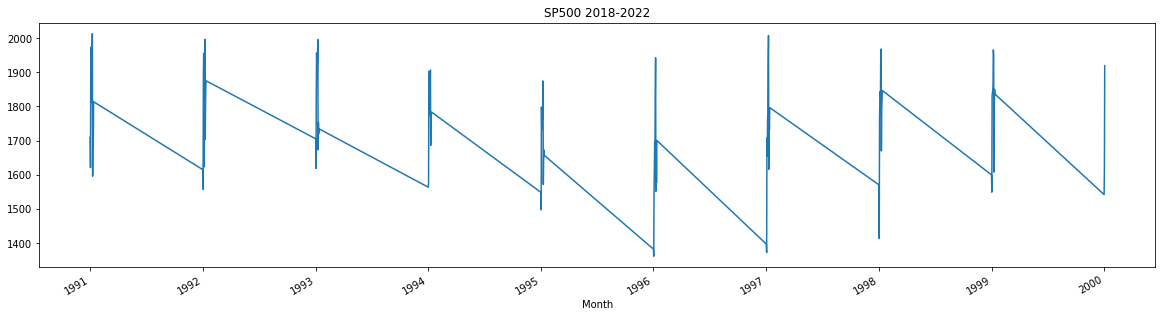

In [10]:
#Visualizamos los datos train
plt.figure(figsize=(20,5))
train.plot()
plt.title('SP500 2018-2022')
plt.show()

# **Revisar autocorrelaciones**

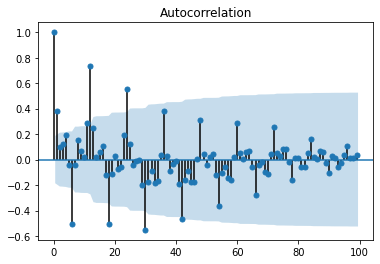

In [35]:
#Importamos el modulo de statsmodels para autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
#Importamos el modulo de Pandas para autocorrelación
from pandas.plotting import autocorrelation_plot


#Graficamos la autocorrelación de la serie
fig = plot_acf(train, lags=99, alpha=0.05)


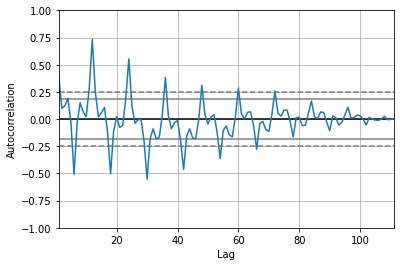

In [12]:
autocorrelation_plot(train)

In [13]:
train.autocorr(lag=30)

-0.7413332332702989

**Se observa que no tiene autocorrelación la serie del dataset**

# **Determinar si la serie es ruido blanco**

**Inicialmente vemos que la media de la serie no es cercana a cero.**

In [14]:
train.describe()

count     111.000000
mean     1754.162324
std       152.084515
min      1360.852000
25%      1650.776000
50%      1775.800000
75%      1863.604000
max      2013.264000
Name: Ridership, dtype: float64

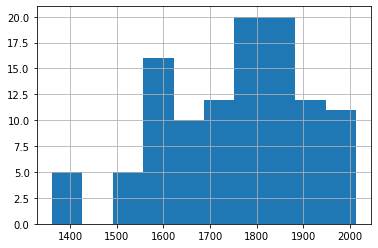

In [15]:
train.hist()

In [16]:
media_movil = train.rolling(window=20).mean()
std_movil = train.rolling(window=20).std()
banda_sup = media_movil + 2 * std_movil
banda_inf = media_movil - 2 * std_movil

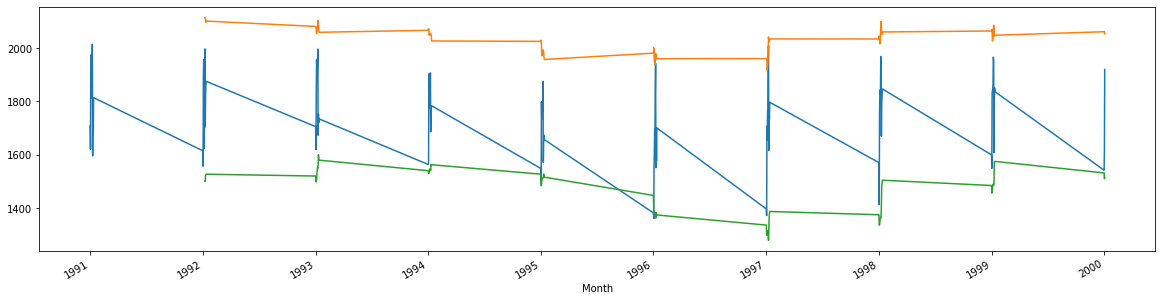

In [17]:
plt.figure(figsize=(20,5))
train.plot()
banda_sup.plot()
banda_inf.plot()
plt.show()

**Como se observaba en el punto anterior la autocorrelación es nula, la media no es cercana a cero y su varianza es constante.** 

**En conclusión la serie Amrak es una serie white noise.**


# **Determinar si la serie es random walk**

# **Descomponerla en trend, seasonality y residuos(usando la biblioteca)**

In [18]:
#Importamos el modulo de statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

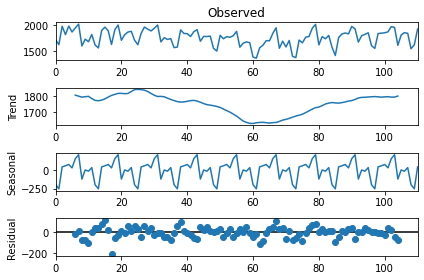

In [19]:
# Ejemplo de descomposición de serie de tiempo
descompose= seasonal_decompose(train.values, period=12)

#Graficamos...
descompose.plot()
plt.show()

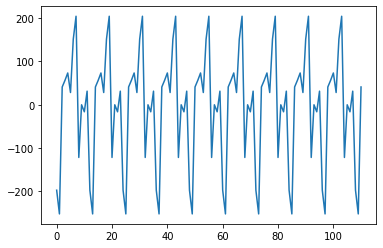

In [20]:
#Graficamos la estacionalidad
plt.plot(descompose.seasonal)
plt.show()

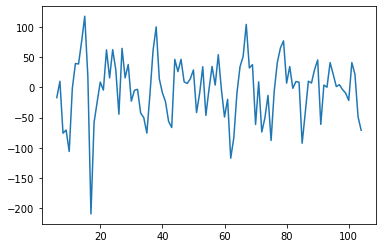

In [21]:
#Graficamos el residuo
plt.plot(descompose.resid)
plt.show()

# **Determinar si la serie es estacionaria**

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
p = adfuller(train)[1]
p

0.7276480495832294

**No es estacionaria la serie Amtrak**

Ho (No es estacionaria) p > 0.05

H1 (Es estacionaria) p < 0.05

# **Método de diferencias**

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [25]:
t = np.arange(len(train))
y = train.values

In [37]:
poly = PolynomialFeatures(degree=10)
t2 = poly.fit_transform(t.reshape(-1, 1))


In [38]:
model = LinearRegression()
model.fit(t2, y)

LinearRegression()

In [39]:
trend = model.predict(t2) # trend = model.coef[0] * t2[1] + model.coef[1] * t2[2] + model.intercept_ 

In [40]:
z = train.values - trend

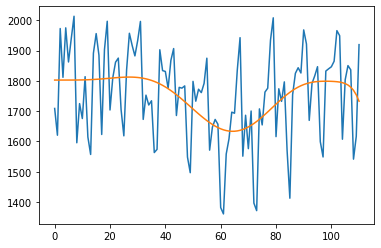

In [41]:
plt.plot(train.values)
plt.plot(trend)

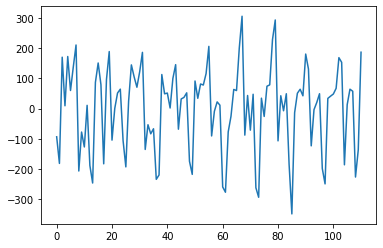

In [42]:
plt.plot(z)

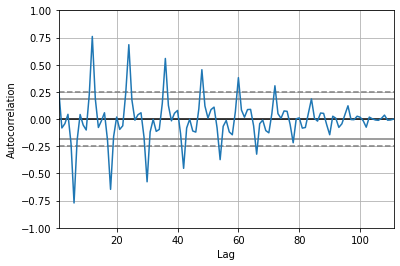

In [43]:
autocorrelation_plot(z)

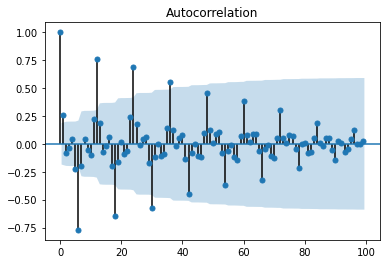

In [44]:
fig = plot_acf(z, lags=99 , alpha=0.05)
fig.show()

In [45]:
p = adfuller(z)[1]
p

0.014342792508939153